In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [2]:
wine=load_wine()
M=wine.data
n=wine.target
M_train,M_test,n_train,n_test=train_test_split(M,n,test_size=0.2,random_state=42)

In [3]:
LDA =LinearDiscriminantAnalysis()
LDA.fit(M_train,n_train)

LinearDiscriminantAnalysis()

In [5]:
n_pred_LDA =LDA.predict(M_test)
accuracy_LDA =accuracy_score(n_test,n_pred_LDA)
precision_LDA =precision_score(n_test,n_pred_LDA,average='weighted')
recall_LDA =recall_score(n_test,n_pred_LDA,average='weighted')
confusion_matrix_LDA =confusion_matrix(n_test,n_pred_LDA)

print("LDA Model Analysis:")
print("Accuracy value caluclated is:", accuracy_LDA)
print("Precision value caluclated is:", precision_LDA)
print("Recall value caluclated is:", recall_LDA)
print("Confusion Matrix computed is:\n", confusion_matrix_LDA)
print("\nClassification Report is as follows:\n", classification_report(n_test,n_pred_LDA))

LDA Model Analysis:
Accuracy value caluclated is: 1.0
Precision value caluclated is: 1.0
Recall value caluclated is: 1.0
Confusion Matrix computed is:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Classification Report is as follows:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



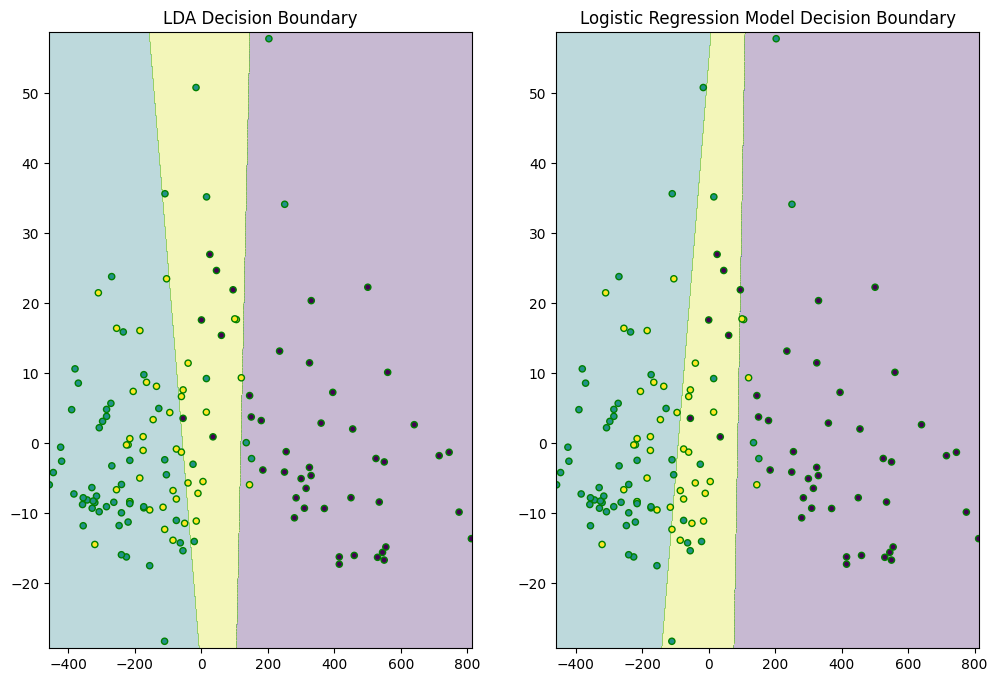

In [7]:
pca =PCA(n_components=2)
M_train_2D =pca.fit_transform(M_train)
M_test_2D =pca.transform(M_test)
lda_2D =LinearDiscriminantAnalysis()
lda_2D.fit(M_train_2D,n_train)
log_reg_2D =LogisticRegression(max_iter=2000)
log_reg_2D.fit(M_train_2D,n_train)
def plot_decision_boundaries(model,M,n,title):
    x_min,x_max =M[:,0].min()-1,M[:,0].max()+1
    y_min,y_max=M[:,1].min()-1,M[:,1].max()+1
    xx,yy =np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    Z =model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z =Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(M[:,0],M[:,1],c=n,edgecolor='green',s=20)
    plt.title(title)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plot_decision_boundaries(lda_2D,M_train_2D,n_train,"LDA Decision Boundary")
plt.subplot(1, 2, 2)
plot_decision_boundaries(log_reg_2D,M_train_2D,n_train,"Logistic Regression Model Decision Boundary")
plt.show()